# Проект: классификация

In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

Данные о клиентах банка:

age (возраст);
job (сфера занятости);
marital (семейное положение);
education (уровень образования);
default (имеется ли просроченный кредит);
housing (имеется ли кредит на жильё);
loan (имеется ли кредит на личные нужды);
balance (баланс).
Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

contact (тип контакта с клиентом);
month (месяц, в котором был последний контакт);
day (день, в который был последний контакт);
duration (продолжительность контакта в секундах).
Прочие признаки:

campaign (количество контактов с этим клиентом в течение текущей кампании);
pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
previous (количество контактов до текущей кампании)
poutcome (результат прошлой маркетинговой кампании).
И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

Начнём с того, что оценим, насколько предложенные данные готовы к дальнейшему анализу. В первую очередь давайте выясним, есть ли в данных пропущенные значения (пустые, незаполненные ячейки).

В каком признаке пропущенных значений больше всего?
Количество пропусков в признаке:

In [654]:
df = pd.read_csv('C:/DS/proect_ml/bank_fin.csv', sep = ';')

In [655]:
        # исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.info()
is_nun=df.isnull().sum()
is_nun


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

Введите слово, которым закодированы пропуски (неизвестные значения).

In [656]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

### Задание 3

Мы нашли пропущенные значения, и хотелось бы теперь их обработать. Однако мы не можем этого сделать, так как не все данные представлены в корректном виде.

Обратите внимание на признак balance: в данных содержится лишняя запятая и знак доллара. По этой причине этот признак не считывается как число. Обработайте данные этого признака так, чтобы он был преобразован в тип float.

In [657]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'].unique()
df['balance']=df['balance'].str.replace('$','').str.replace(' ','').str.replace(',','.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11137 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Задание 4

Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.
1529.129
 

In [658]:
df['balance'].median()

550.0

In [659]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance']=df['balance'].fillna(df['balance'].mode())
df.info()
round(df['balance'].mean(),3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11137 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


1529.129

Итак, значения в признаке balance приобрели нормальный вид, и теперь мы можем обработать пропуски, которые в нём присутствуют. Конечно, пропуски можно было бы просто удалить, но мы поступим по-другому: заменим пропуски на медианное значение по этому признаку.
Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [660]:
df['balance']=df['balance'].fillna(df['balance'].median())
round(df['balance'].mean(),3)

1526.936

### Задание 5

Ранее мы выяснили, что в признаке job есть пропущенные значения, которые не отображаются как пропуски в явном виде. Однако нам всё равно важно их обработать. Мы знаем, что для категориальных признаков пропущенные значения заменяются модой по данному признаку.

Замените все пропущенные значения в признаке job на модальные. То же самое сделайте с признаком, отвечающим за уровень образования.
После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [661]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['education'].unique()
moda_education=df['education'].mode()[0]
df['education']=df['education'].replace('unknown',moda_education)
df['education'].unique()
moda_job=df['job'].mode()[0]
df['job']=df['job'].replace('unknown',moda_job)
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'self-employed', 'student'], dtype=object)

In [662]:
print(moda_job)
print(moda_education)
mask_j_e = df[(df['job'] == 'management') & (df['education'] == 'secondary')]
round(mask_j_e['balance'].mean(),3)

management
secondary


1598.883

### Задание 6

Изучите признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха () , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха. (). Найдите эти границы, и отфильтруйте значения так, чтобы выбросов в данных не осталось.

Примечание. Несмотря на то что существуют более продвинутые методы поиска аномальных значений, для обработки одного числового признака достаточно хорошо подходит метод Тьюки. После решения задачи вы сможете попробовать применить и другие методы, оценив их влияние на качество поиска.
Сколько объектов осталось после удаления всех выбросов?

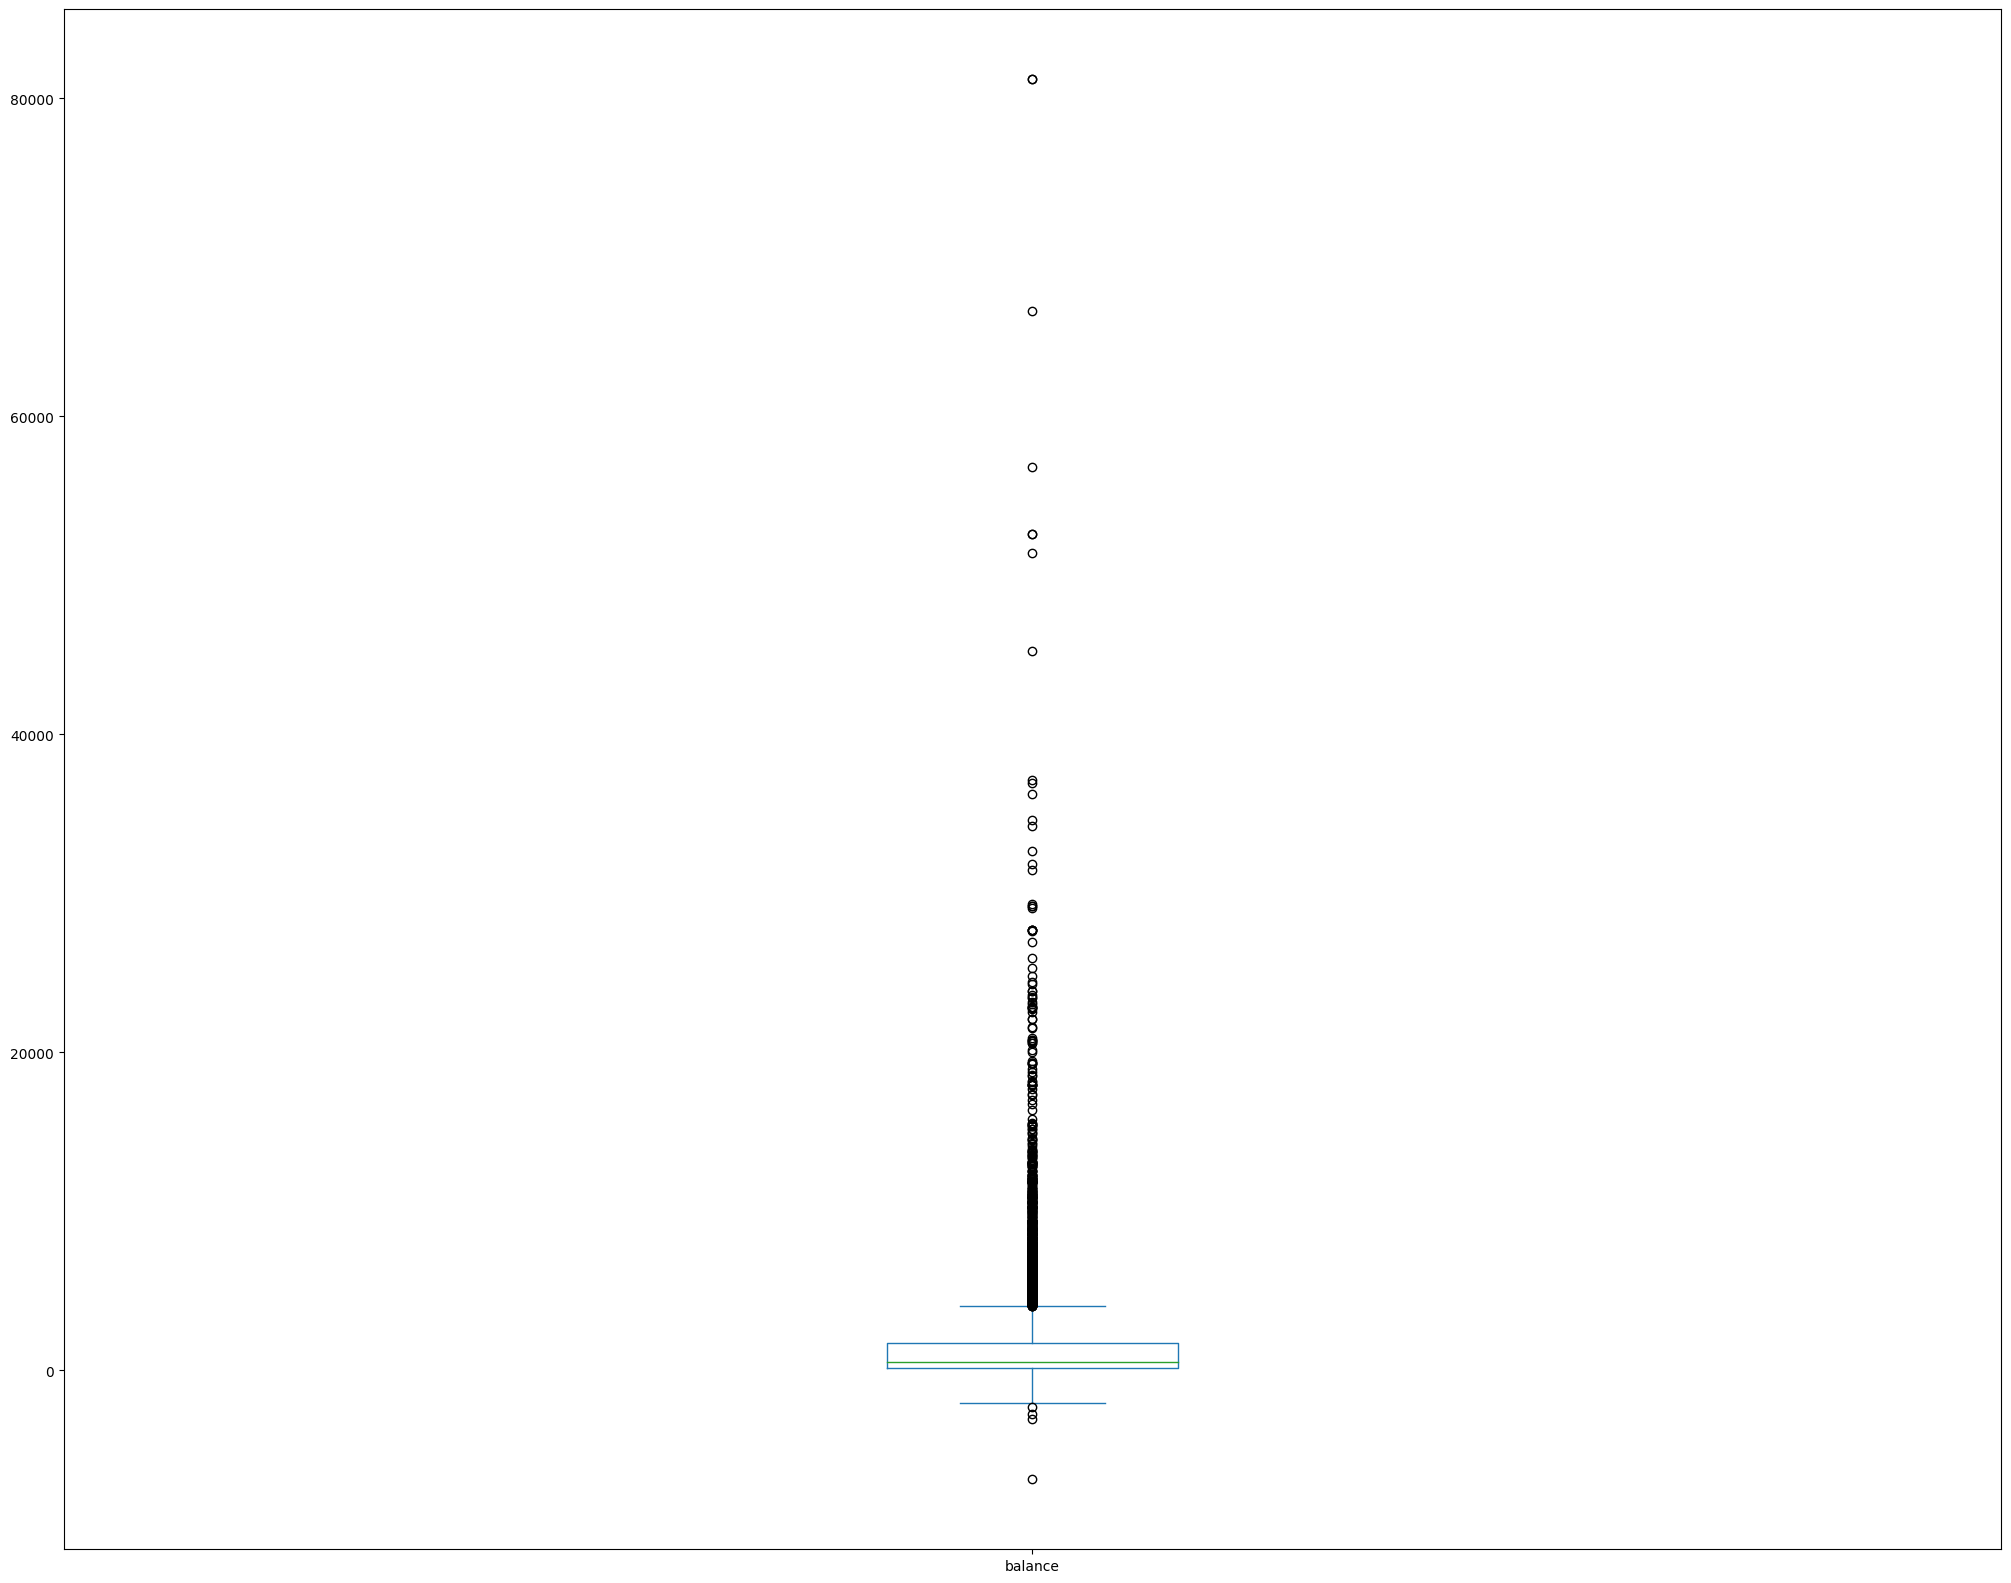

In [663]:
# удалите все выбросы для признака balance
# ваш код
df['balance'].plot(kind='box',figsize=(25,20))
plt.show()

In [664]:
# Вычисление IQR для каждого признака
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Удаляем выбросы
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
print(lower_bound)
print(upper_bound)
df.shape






-2241.0
4063.0


(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

Давайте изучим распределение целевой переменной: есть ли несбалансированность классов? Чтобы это определить, вычислите частоты для открывших депозит и для тех, кто его не открыл. Сопроводите числа диаграммой, отражающей полученные результаты.
Сколько клиентов открыли депозит?

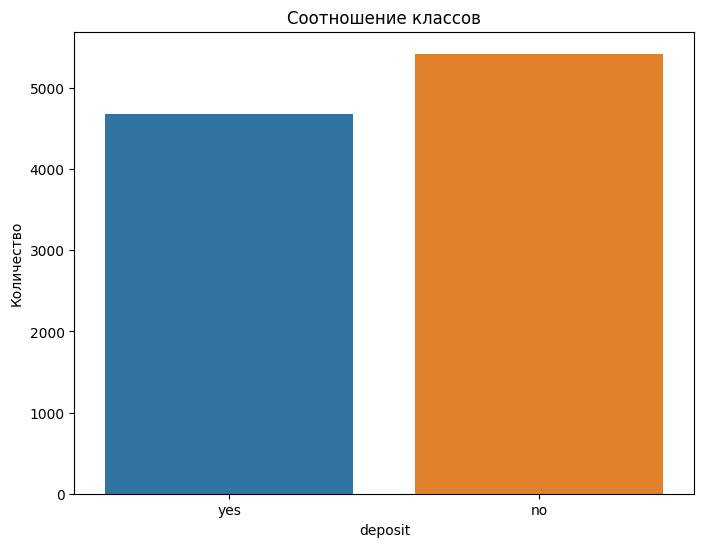

deposit
no     5424
yes    4681
Name: count, dtype: int64

In [665]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
# Построение графика
plt.figure(figsize=(8, 6))
sns.countplot(x='deposit', data=df)
plt.title('Соотношение классов')
plt.xlabel('deposit')
plt.ylabel('Количество')
plt.show()
df['deposit'].value_counts()

### Задания 2 и 3

Начнём с описательных статистик для количественных переменных.

Рассчитайте их и продумайте подробную интерпретацию.
Попробуйте описать данные, которые у вас есть, увидеть первые зависимости.
Рассмотрите минимальные и максимальные значения.
Посмотрите на меры разброса и оцените, насколько данные вариативны.
Сравнив меры центральной тенденции, сделайте выводы о том, есть ли аномальные значения с меньшей или большей стороны.
Дополните выводы визуализациями. Вспомните, какие диаграммы могут помочь в иллюстрации распределений количественных данных.
Каков максимальный возраст клиента банка?
Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд.

In [666]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


Теперь давайте рассмотрим описательные статистики для категориальных переменных.

Попробуйте извлечь максимум информации из тех показателей, которые можете получить. Сколько всего сфер занятости представлено среди клиентов банка? В каждый ли месяц проходила маркетинговая кампания? Какое семейное положение встречается чаще всего? А образование? Постарайтесь дать достаточно подробную интерпретацию. Для лучшей наглядности добавьте визуализации по каждой категориальной переменной.

Совет. Вопросы, приведённые выше, — это лишь пример того, что можно рассмотреть. Постарайтесь самостоятельно составить различные выводы и описать их. Сделайте информативные и красивые визуализации, дополняющие ваши выводы.
Сколько было месяцев, в которых проводилась маркетинговая кампания?
Сколько сфер занятости представлено среди клиентов банка?

In [667]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


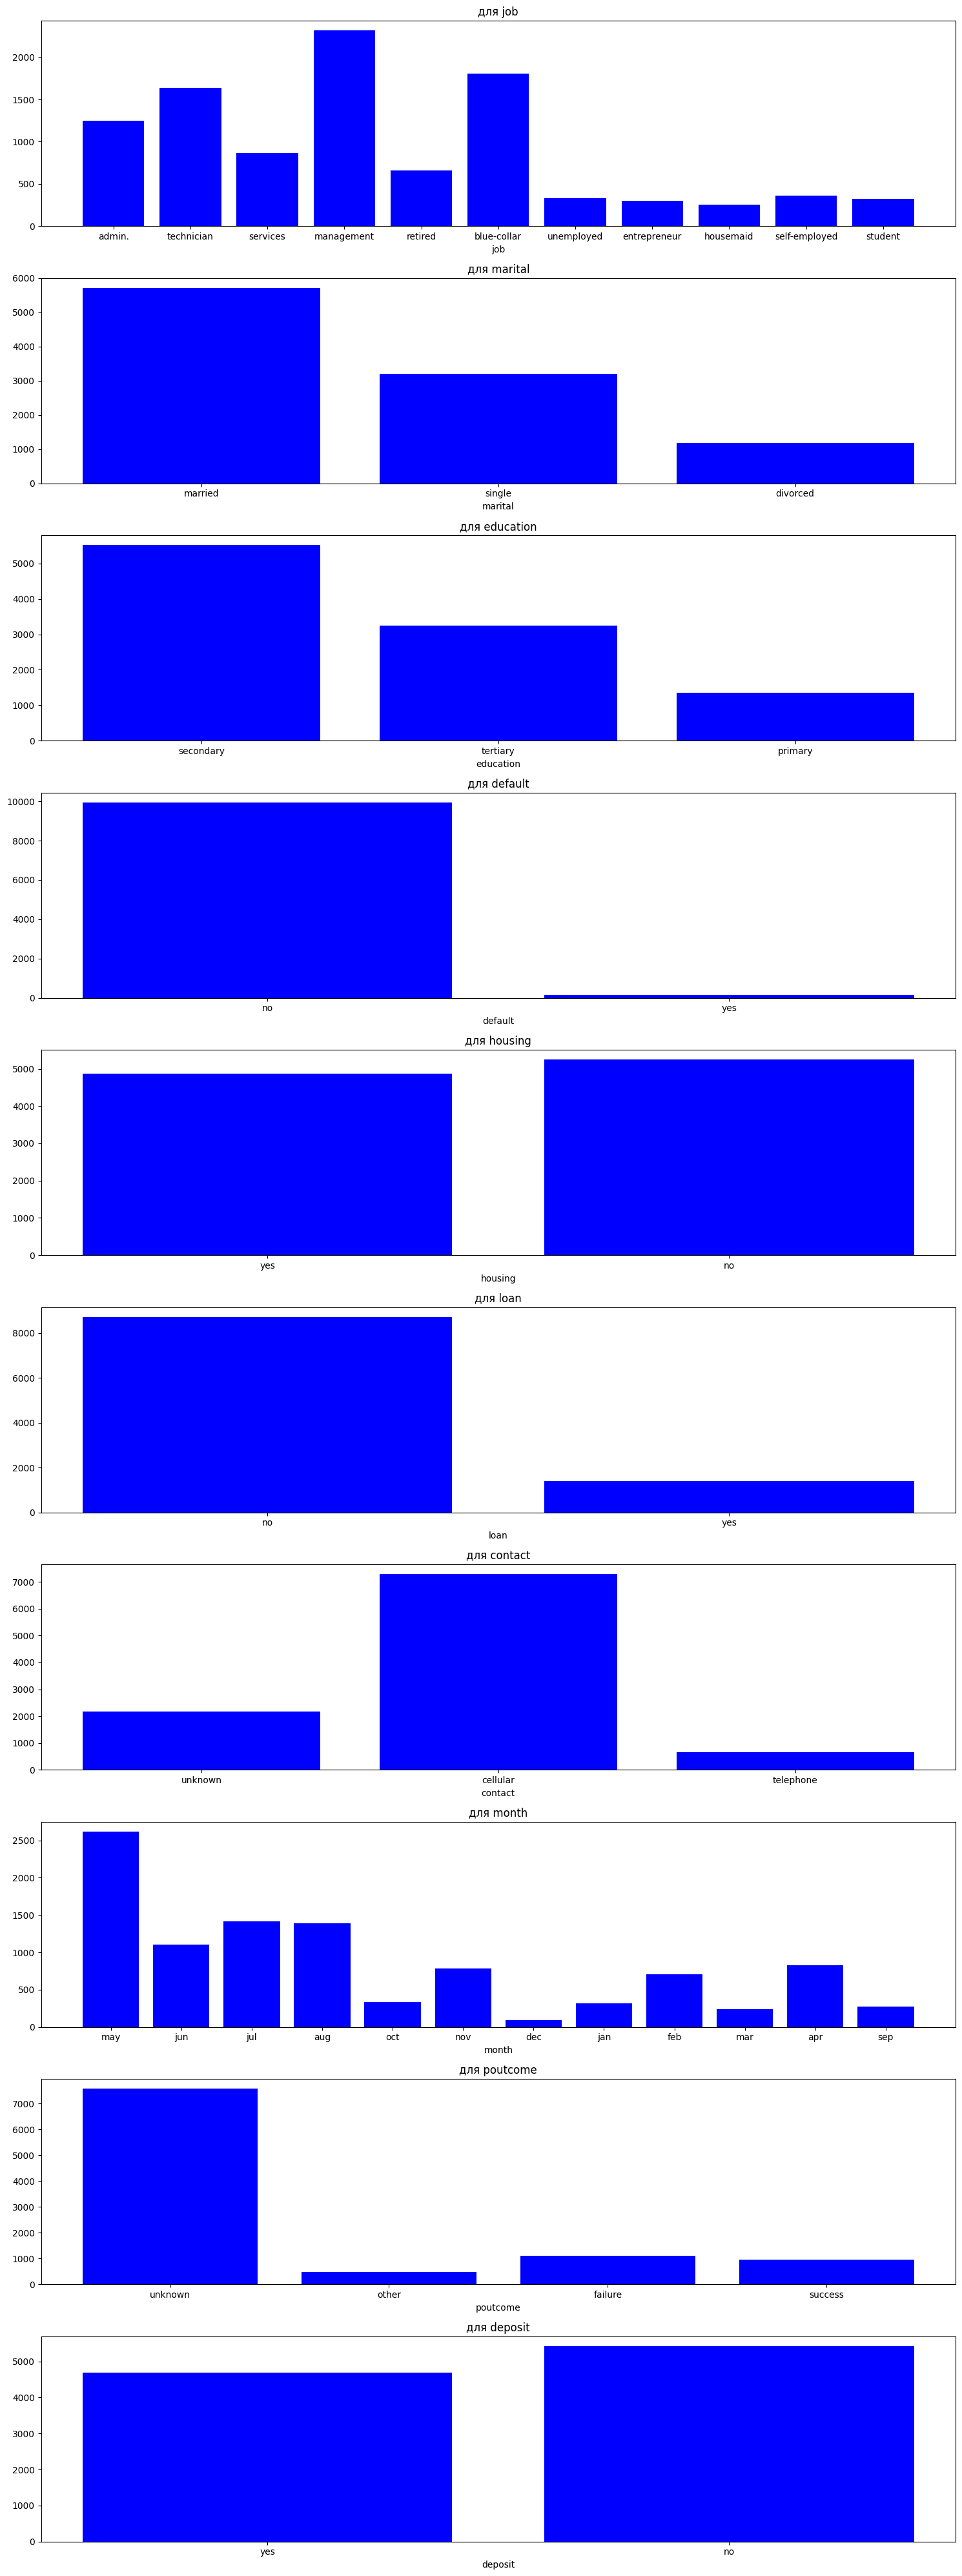

In [668]:
from collections import Counter
import math
# Количество категориальных признаков
categorical_columns = df.select_dtypes(include=['object']).columns

# Количество панелей для графиков (одна панель на категориальный признак)
n_cols = 1
num_rows=math.ceil(len(categorical_columns)/n_cols)

# Размер фигуры
plt.figure(figsize=(n_cols * 15,num_rows* 4))

# Построение гистограмм для каждого категориального признака
for i, col in enumerate(categorical_columns):
   plt.subplot(num_rows, n_cols, i + 1)
   frequencies = Counter(df[col])
   plt.bar(frequencies.keys(), frequencies.values(), color='blue')
   plt.title(f'для {col}')
   plt.xlabel(col)
   plt.ylabel('')

plt.tight_layout()
plt.show()

### Задания 4 и 5

Теперь давайте узнаем, есть ли разница в результатах текущей маркетинговой кампании и предыдущей. Возможно, люди, которые уже однажды согласились на предложение банка, более склонны принять его вновь. А возможно, ситуация ровно обратная. Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
Напишите значение статуса предыдущей кампании, для которой в текущей успехов намного больше, чем неудач.

In [669]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

<Axes: xlabel='poutcome'>

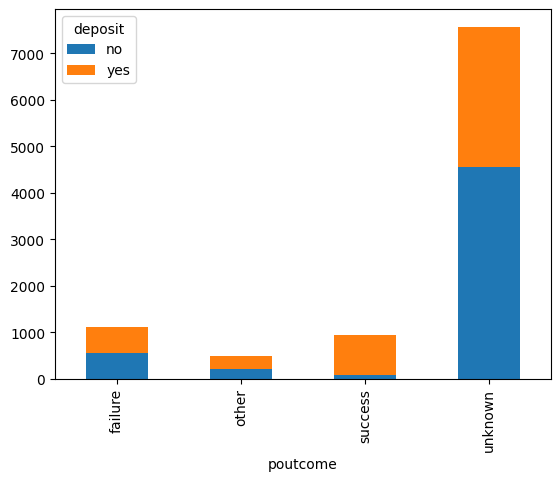

In [670]:
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Теперь давайте узнаем, какова зависимость результата маркетинговых кампаний от месяца.

Временные периоды, сезоны, близость к каким-то праздникам часто влияют на решение клиентов использовать определённые услуги.
Рассчитайте, в каком месяце самый большой процент неудач при взаимодействии в текущей маркетинговой кампании. Возможно, этот месяц не является подходящим для проведения подобных акций, и это стоит отметить. Введите название месяца латиницей ровно так, как месяц обозначен в данных.

<Axes: xlabel='month'>

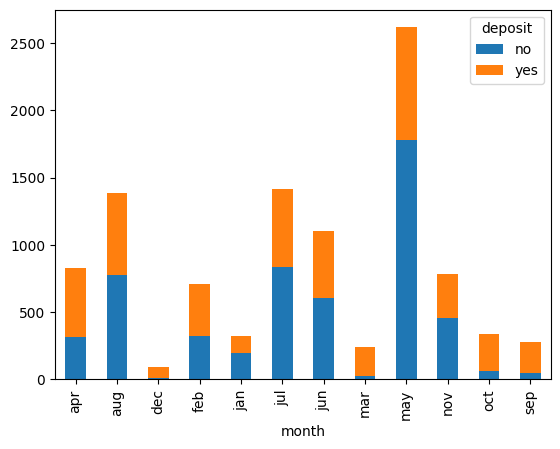

In [671]:
types = df.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [672]:
for i in np.unique(df.month):
    print(i, df[(df.month == i)&(df.deposit == 'no')].shape[0]/df[(df.month == i)].shape[0])

apr 0.3819277108433735
aug 0.5595667870036101
dec 0.0967741935483871
feb 0.45557122708039494
jan 0.6081504702194357
jul 0.5895627644569816
jun 0.5489130434782609
mar 0.10126582278481013
may 0.6786396637371036
nov 0.5846153846153846
oct 0.18507462686567164
sep 0.16546762589928057


### Задание 6

In [673]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

### Задание 7

In [674]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
res_n = df[df.deposit == 'no'].groupby(['month'])['deposit'].count()
res_n# ваш код

month
apr     317
aug     775
dec       9
feb     323
jan     194
jul     836
jun     606
mar      24
may    1776
nov     456
oct      62
sep      46
Name: deposit, dtype: int64

### Задание 8

Нам бы очень хотелось посмотреть, люди какого возраста чаще открывают депозиты, а какого — реже. Однако, так как возрастной разброс достаточно большой, визуализация для всех возрастов или нахождение статистики для каждого возраста не будет содержательным. В аналитике принято разделять людей по возрастным подгруппам и делать выводы уже по ним.

Создайте новую переменную, в которой будет находиться индикатор принадлежности к одной из следующих категорий:

'<30';
'30-40';
'40-50';
'50-60';
'60+'.
Совет. После создания этой переменной постройте диаграмму (на ваш вкус), которая, с вашей точки зрения, сможет наилучшим образом отобразить различия в количестве открытых/не открытых депозитов для каждой возрастной группы.

<Axes: xlabel='age_group'>

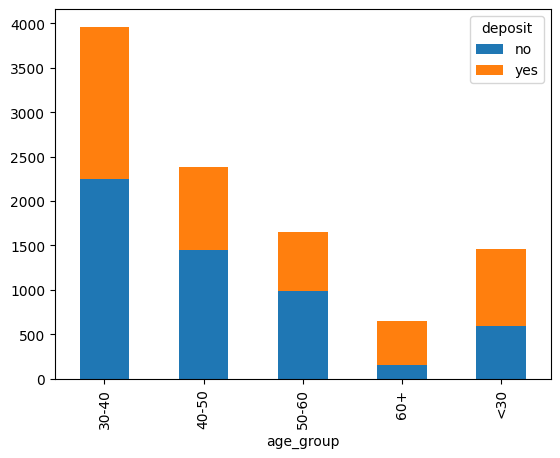

In [675]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
df['age_group']=df['age'].apply(lambda x:'<30' if x<30 else '30-40' if 30<=x <40 else '40-50' if 40<=x<50 else '50-60' if 50<=x<60 else '60+' )
df['age_group'].unique()
types = df.groupby("age_group")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [676]:
res_age_group = df[df.deposit == 'no'].groupby(['age_group'])['deposit'].count()
res_age_group

age_group
30-40    2245
40-50    1444
50-60     984
60+       157
<30       594
Name: deposit, dtype: int64

### Задания 9 и 10

Давайте посмотрим, как зависит соотношение успешных и неуспешных контактов с клиентами от категорий, к которым относятся клиенты:

семейное положение;
уровень образования;
сфера занятости.
Постройте визуализации, отражающие количество тех, кто открыл депозит, и тех, кто его не открыл, для всех категорий предложенных выше трёх признаков. Постарайтесь оформить диаграммы максимально наглядно и описать полученный результат.

К каким категориям относится бόльшая часть людей? Среди каких групп населения есть тенденция соглашаться открывать депозит, а среди каких — отказываться?
В какой сфере занято наибольшее число клиентов банка?
При каком семейном положении есть тенденция открывать депозит, а не отказываться от его открытия?

marital
divorced    0.886218
married     0.730245
single      1.146293
Name: deposit, dtype: float64

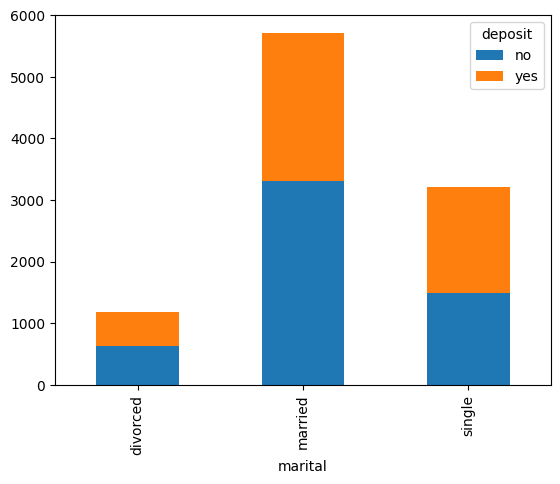

In [677]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
types = df.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')
res_n = df[df.deposit == 'no'].groupby(['marital'])['deposit'].count()
res_y= df[df.deposit == 'yes'].groupby(['marital'])['deposit'].count()
#res_k = df.groupby([''])['deposit'].count()
res_k=res_y/res_n
res_k

<Axes: xlabel='education'>

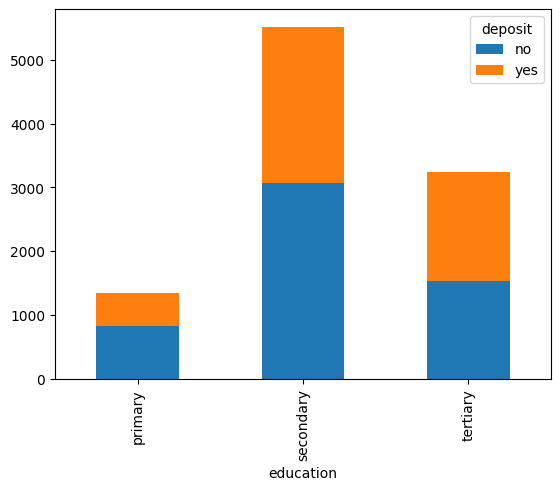

In [678]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
types = df.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

job
admin.            574
blue-collar       652
entrepreneur      111
housemaid          99
management       1135
retired           432
self-employed     161
services          345
student           245
technician        738
unemployed        189
Name: deposit, dtype: int64

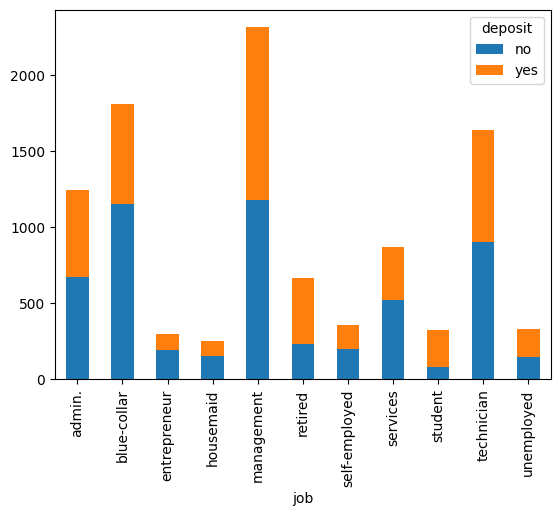

In [679]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
types = df.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')
res_y = df[df.deposit == 'yes'].groupby(['job'])['deposit'].count()
res_y

<Axes: xlabel='count', ylabel='marital'>

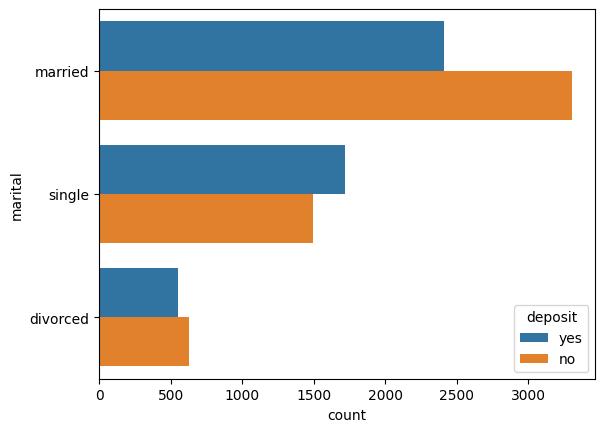

In [680]:
sns.countplot(y='marital', hue='deposit', data=df)

### Задание 11

В предыдущих заданиях мы посмотрели различные категории отдельно. Но что будет, если посмотреть на пересечения категорий? Каких людей среди открывших депозит больше: одиноких с высшим образованием или разведённых с более низким уровнем образования?

Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. Для каждой части постройте сводную диаграмму по уровню образования и семейному положению. Представьте результаты в виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для неоткрывших? Какой вывод вы можете сделать, исходя из полученных данных?
ересечение каких двух категорий является самым многочисленным?

In [681]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
df_y = df[df['deposit'] == 'yes']
df_n = df[df['deposit'] == 'no']

# Построение сводной таблицы для каждой части
pivot_df_y = df_y.pivot_table(index='education', columns='marital', aggfunc='size', fill_value=0)
pivot_df_n = df_n.pivot_table(index='education', columns='marital', aggfunc='size', fill_value=0)
pivot_df_y.head()
pivot_df_n.head()


marital,divorced,married,single
education,,,
primary,91,641,100
secondary,370,1830,866
tertiary,163,832,531


In [682]:
pivot_df_y.head()

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


Text(737.5404040404039, 0.5, 'Education Level')

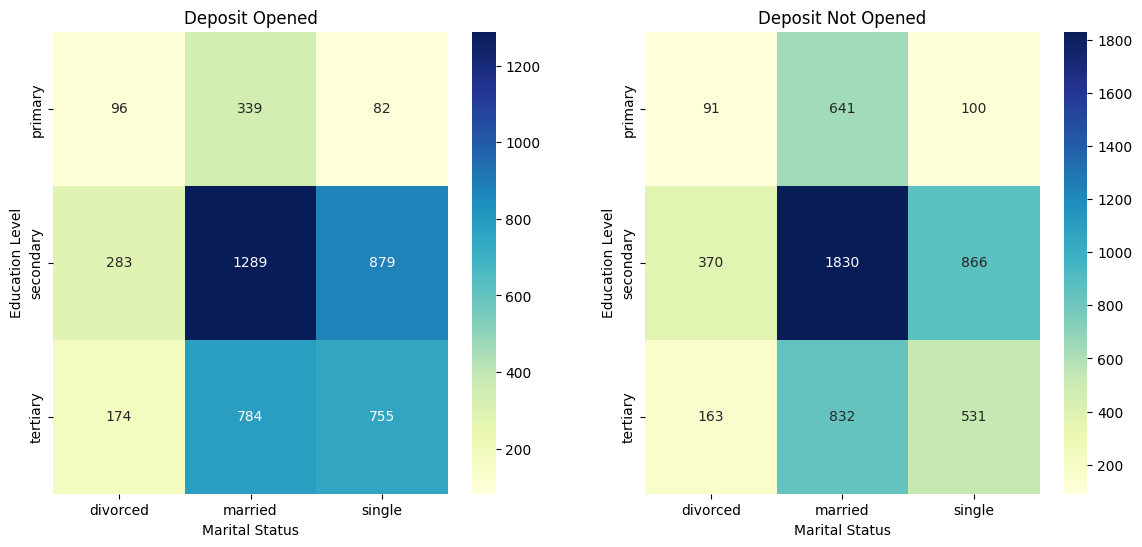

In [683]:
# Визуализация сводных таблиц в виде тепловых карт
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(pivot_df_y, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Deposit Opened')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Education Level')

sns.heatmap(pivot_df_n, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Deposit Not Opened')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Education Level')

## Часть 3: преобразование данных

### Задание 1

Перед тем как перейти к построению модели, осталось сделать ещё один шаг.

Следует помнить, что алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. По ходу работы алгоритм считает показатели (например, средние значения), которые можно вычислить только для количественных признаков. Поэтому нам необходимо преобразовать категориальные признаки в более удобный формат.
Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить качество модели.
Надо отобрать признаки, которые мы будем использовать для обучения модели.
Начнём с обработки категориального порядкового признака, который отвечает за уровень образования: education.

Обработайте его с помощью метода LabelEncoder, используя метод без дополнительных настроек. 
Найдите сумму получившихся значений для признака education.

In [684]:
# преобразуйте уровни образования
lab_enc = LabelEncoder()

# Кодирование признака
df['education'] = lab_enc.fit_transform(df['education'])
df['education'].sum()

11995

In [685]:
le = LabelEncoder()
df["age_group"] = le.fit_transform(df["age_group"])

In [686]:
df[['age_group','age']]

,age_group,age
0,2,59
1,2,56
2,1,41
3,2,55
4,2,54
...,...,...
11157,0,33
11158,0,39
11159,0,32
11160,1,43



Ранее мы создали порядковую переменную для возраста. Обработайте её по такому же принципу, чтобы её можно было использовать при обучении модели.

Обычно в задачах бинарной классификации целевую переменную кодируют как бинарный признак, который принимает значения 1 или 0. Так как наш проект будет соответствовать всем правилам хорошего тона, давайте перекодируем переменную deposit таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.

In [687]:
df['deposit']=df['deposit'].apply(lambda x: 1 if x=='yes' else 0)
df['deposit'].value_counts()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,2
1,56,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,1,2
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,1
3,55,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,1,2
4,54,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,1,2


In [688]:
df['deposit'].value_counts()

deposit
0    5424
1    4681
Name: count, dtype: int64

Вычислите стандартное отклонение по преобразованной в корректный вид целевой переменной deposit. Ответ округлите до трёх знаков после точки-разделителя.

In [689]:
round(df['deposit'].std(),3)


0.499

### Задания 2 и 3

Сделаем то же самое для других бинарных переменных, которых у нас три:

'default';
'housing';
'loan'.
Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0.
Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.
0.635
  верно 

In [690]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df['default']=df['default'].apply(lambda x: 1 if x=='yes' else 0)
df['housing']=df['housing'].apply(lambda x: 1 if x=='yes' else 0)
df['loan']=df['loan'].apply(lambda x: 1 if x=='yes' else 0)
df['default'].value_counts()

default
0    9939
1     166
Name: count, dtype: int64

In [691]:
res_mean=df['default'].mean()+df['housing'].mean()+df['loan'].mean()
round(res_mean,3)

0.635

### Задание 4

Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

'job';
'marital';
'contact';
'month';
'poutcome'.
Создайте для них dummy-переменные и добавьте их в набор данных.

In [692]:
# создайте дамми-переменные
col_list=['job', 'marital', 'contact', 'month', 'poutcome']
df_dummy=pd.get_dummies(df[col_list])
df=pd.concat([df,df_dummy],axis=1)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
1,56,admin.,married,1,0,45.0,0,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
2,41,technician,married,1,0,1270.0,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
3,55,services,married,1,0,2476.0,1,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True
4,54,admin.,married,2,0,184.0,0,0,unknown,5,...,False,False,True,False,False,False,False,False,False,True


In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   job                10105 non-null  object 
 2   marital            10105 non-null  object 
 3   education          10105 non-null  int32  
 4   default            10105 non-null  int64  
 5   balance            10105 non-null  float64
 6   housing            10105 non-null  int64  
 7   loan               10105 non-null  int64  
 8   contact            10105 non-null  object 
 9   day                10105 non-null  int64  
 10  month              10105 non-null  object 
 11  duration           10105 non-null  int64  
 12  campaign           10105 non-null  int64  
 13  pdays              10105 non-null  int64  
 14  previous           10105 non-null  int64  
 15  poutcome           10105 non-null  object 
 16  deposit            10105 no

Теперь давайте оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.

Для этого постройте матрицу корреляций. Дополните её тепловой картой, отражающей результат. Не забудьте, что для того, чтобы вычислить коэффициенты корреляции, необходимо, чтобы целевая переменная была числовой.

В качестве дополнения визуализации к этому заданию постройте столбчатую диаграмму для ранжированных коэффициентов корреляции.

Задание 4.5
1 из 1 балла (оценивается)
 Помощь по управлению с клавиатуры
Расставьте признаки, в наибольшей степени коррелирующие с целевой переменной, по убыванию силы линейной взаимосвязи.
Есть ли среди признаков мультиколлинеарность? Будем считать достаточно сильной корреляцию не менее 0.9.

In [694]:
df_num=df.select_dtypes(exclude=['object'])
corr = df_num.corr()

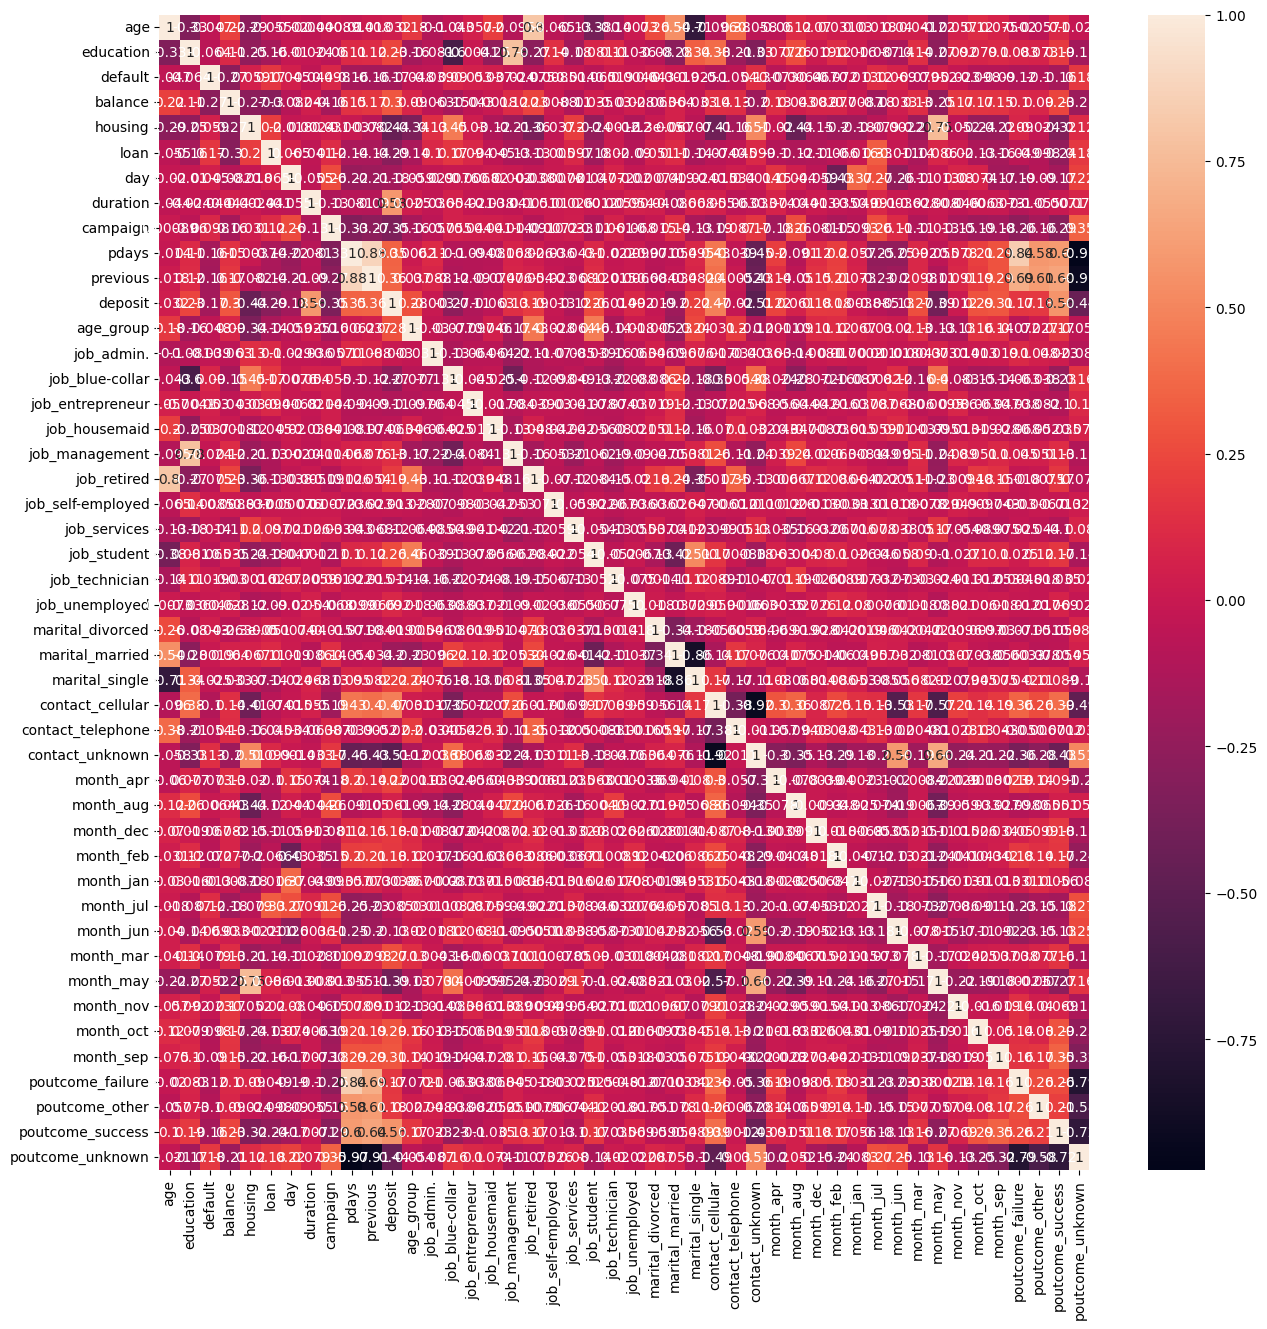

In [695]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr.corr(), annot = True);

### Задания 5 и 6

In [696]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
new_corr= corr['deposit'].reset_index()
sort_corr = new_corr.sort_values('deposit', ascending=False)
sort_corr.head(10)

,index,deposit
11,deposit,1.000000
7,duration,0.457818
44,poutcome_success,0.288491
27,contact_cellular,0.223944
9,pdays,0.147917
10,previous,0.141102
12,age_group,0.136243
3,balance,0.135893
37,month_mar,0.135348
40,month_oct,0.130599


### Задания 7 и 8

Теперь вам необходимо определить целевую переменную и предикторы, а также разделить выборку на обучающую и тестовую.

При разбиении задайте параметр random_state = 42, а размер тестовой выборки возьмите за 0.33. Не забудьте добавить аргумент, определяющий сохранение соотношений целевого признака.
Каким получился размер тестовой выборки?
3335
  верно 
 Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.
0.46
  верно 

In [697]:
df = df.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

In [698]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [699]:
# рассчитайте необходимые показатели
y_test.shape

(3335,)

In [700]:
round(y_test.mean(),2)

0.46

### Задание 9

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберите 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_classif.

Помните, что на данном этапе вам необходимо оставить только те признаки, которые содержат лишь числовые значения.

In [701]:
df.head()


,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,False,False,True,False,False,False,False,False,False,True
1,56,1,0,45.0,0,0,5,1467,1,-1,...,False,False,True,False,False,False,False,False,False,True
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,False,False,True,False,False,False,False,False,False,True
3,55,1,0,2476.0,1,0,5,579,1,-1,...,False,False,True,False,False,False,False,False,False,True
4,54,2,0,184.0,0,0,5,673,2,-1,...,False,False,True,False,False,False,False,False,False,True


In [702]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # или другой статистический тест

selector = SelectKBest(score_func=f_classif, k=15)

X_new = selector.fit_transform(X_train, y_train)

mask = selector.get_support()
selected_features = X.columns[mask]
print(list (selected_features))

['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous', 'age_group', 'contact_cellular', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


### Задание 10

Теперь данные необходимо нормализовать.

Есть разные варианты нормализации, но мы будем использовать min-max-нормализацию.

Помните, что нормализация требуется для предикторов, а не для целевой переменной.

Нормализуйте предикторы в обучающей и тестовой выборках.
Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из тестовой выборки. Ответ округлите до двух знаков после точки-разделителя.
0.47
  верно 
 


In [703]:
df = df[['balance', 'housing', 'duration', 'campaign', 'pdays', 
         'previous', 'age_group', 'contact_cellular', 'contact_unknown',
         'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown', 'deposit']]

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [704]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(round(X_test_scaled[:,0].mean(),2))

0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

Для начала реализуем самый простой алгоритм, который вам известен — логистическую регрессию. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций.

Оцените качество модели на тестовой выборке.
Для получившейся модели вычислите значение accuracy на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.
0.81
  верно 
 

In [705]:
# обучите логистическую регрессию и рассчитайте метрики качества
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter = 1000, random_state=42,solver='sag')
#Обучаем модель, минимизируя 
log_reg.fit(X_train_scaled, y_train)

y_test_pred = log_reg.predict(X_test_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(log_reg.score(X_test_scaled, y_test)))
#print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))

accuracy на тестовом наборе: 0.80
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335



Простой алгоритм обучен. Теперь давайте обучим ещё один алгоритм — решающие деревья. В качестве параметров для начала возьмём следующие:

criterion = 'entropy';
random_state = 42.
Остальные параметры оставьте по умолчанию.

Задание 5.2
1/1 point (graded)
Что можно наблюдать после реализации алгоритма и оценки его качества?
Недообучение
Переобучение
Утечку данных

### Задания 2,3,4

Переберите различные максимальные глубины деревьев и найдите глубину дерева, для которой будет максимальное значение метрики accuracy, но при этом ещё не будет наблюдаться переобучения (т. е. не будет расти качество на обучающей выборке при неизменном качестве на тестовой).
Какое наибольшее значение accuracy у вас получилось? Ответ округлите до двух знаков после точки-разделителя.
0.81
  верно 
  Какую максимальную глубину дерева вы задали?

In [706]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
    #max_depth = 6
)

dt.fit(X_train_scaled, y_train)
y_test_pred = dt.predict(X_test_scaled)
y_train_pred = dt.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(dt.score(X_test_scaled, y_test)))
print("accuracy на train наборе: {:.2f}".format(dt.score(X_train_scaled, y_train)))

#print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))



accuracy на тестовом наборе: 0.75
accuracy на train наборе: 1.00
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1790
           1       0.74      0.71      0.72      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.74      0.75      3335
weighted avg       0.75      0.75      0.75      3335



In [707]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)

dt.fit(X_train_scaled, y_train)
y_test_pred = dt.predict(X_test_scaled)
y_train_pred = dt.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(dt.score(X_test_scaled, y_test)))
print("accuracy на train наборе: {:.2f}".format(dt.score(X_train_scaled, y_train)))

#print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))


accuracy на тестовом наборе: 0.81
accuracy на train наборе: 0.82
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому мы можем использовать оптимизацию: можно перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз.

Реализуйте оптимизацию гиперпараметров с помощью GridSearch, перебрав следующие параметры:

'min_samples_split': [2, 5, 7, 10];
'max_depth':[3,5,7].
Оцените метрику  на тестовой выборке для наилучшей комбинации перебираемых параметров. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.
0.79
  верно 
 

In [708]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[3,5,7]
              }
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        random_state=42 #генератор случайных чисел
            ),
    param_grid=param_grid,
    cv=3,
    n_jobs = -1
)
%time grid_search.fit(X_train_scaled, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: total: 188 ms
Wall time: 13.7 s
accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


### Задание 5

Обучите случайный лес со следующими параметрами:

n_estimators = 100;
criterion = 'gini';
min_samples_leaf = 5;
max_depth = 10;
random_state = 42.
Оцените метрики accuracy и recall для построенной модели на тестовой выборке. В качестве ответов введите значения метрик. Ответ округлите до двух знаков после точки-разделителя.

Accuracy:
0.83
  верно 
 
Recall:
0.84
  верно 
 

In [709]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test_scaled)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print()
print('Train: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

Train: 0.86
Test accuracy: 0.83

Train: 0.86
Test recall: 0.83


In [710]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)
y_test_pred = rf.predict(X_test_scaled)


print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))


Test accuracy: 0.83
Test recall: 0.83


Дата-сайентист не должен останавливаться на одной модели — он должен пробовать все доступные варианты. Поэтому теперь предлагаем вам сравнить полученные результаты с моделью градиентного бустинга. Используйте градиентный бустинг для решения задачи классификации, задав для него следующие параметры:

learning_rate = 0.05;
n_estimators = 300;
min_samples_leaf = 5;
max_depth = 5;
random_state = 42.
Для построенной модели оцените метрику  на тестовой выборке. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.
0.82
  верно 
 
Отправить
Какая модель даёт более качественный прогноз (если посмотреть известные вам метрики в целом)?
Случайный лес
Градиентный бустинг

In [711]:
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

y_train_pred = gb.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = gb.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.82


Вы уже попробовали построить разные модели, и теперь пришло время построить ансамбль из моделей разного типа.

В этом задании вам необходимо использовать стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используйте модель логистической регрессии.

Параметры оставьте те же, что были в ваших алгоритмах в предыдущих заданиях.
Задание 6.4
1 point possible (graded)
Для построенной модели оцените метрику precision на тестовой выборке. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.

In [712]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('dt',tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)),
   ( 'log_reg', linear_model.LogisticRegression(random_state=42,solver='sag',max_iter = 1000)),
    
    ('gb', ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
))
]

# Создаем объект класса стекинг
reg =ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
# Обучаем модель
reg.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       random_state=42)),
                               ('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [713]:
y_test_pred = reg.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.precision_score(y_test, y_test_pred)))

Test: 0.80


In [714]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1790
           1       0.80      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



Разумеется, не все признаки одинаково хорошо предсказывают результат маркетинговой кампании. Для того чтобы отобрать наиболее значимые для нас аспекты, на которые надо будет обратить внимание при реализации следующей акции, давайте выберем три признака, дающих наибольший вклад.

Почему, с вашей точки зрения, именно эти три признака имеют наибольшую важность?


In [715]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # или другой статистический тест

selector = SelectKBest(score_func=f_classif, k=3)

X_new = selector.fit_transform(X_train_scaled, y_train)

mask = selector.get_support()
selected_features = X.columns[mask]
scores=selector.scores_
f_s=pd.DataFrame({'Feature':X.columns,"Score":scores})
f_s=f_s.sort_values(by='Score',ascending=False)
print(list (selected_features))

print(selected_features)
print(f_s)

['duration', 'contact_unknown', 'poutcome_success']
Index(['duration', 'contact_unknown', 'poutcome_success'], dtype='object')
             Feature        Score
2           duration  1839.078214
13  poutcome_success   628.351616
8    contact_unknown   427.557659
14  poutcome_unknown   373.006765
7   contact_cellular   350.501992
1            housing   301.264198
10         month_may   183.875989
5           previous   153.923796
4              pdays   148.749979
6          age_group   147.481421
3           campaign   139.486664
12         month_sep   130.230009
11         month_oct   125.319693
9          month_mar   114.759591
0            balance   114.356404


Ранее мы уже рассматривали оптимизацию гиперпараметров при помощи GridSearch. Однако вы знаете, что это не единственный способ. Один из более продвинутых вариантов оптимизации гиперпараметров — фреймворк Optuna. Примените его для оптимизации гиперпараметров. Для перебора возьмите случайный лес и следующие параметры:

n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
max_depth = trial.suggest_int('max_depth', 10, 30, 1);
min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).
Задание 6.6
1 point possible (graded)
Введите значение метрики f1 на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [716]:
!pip install optuna


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [717]:
import optuna

In [718]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  #score = metrics.f1_score(y_test, model.predict(X_test_scaled))
  score = metrics.accuracy_score(y_test, model.predict(X_test_scaled))

  return score



In [719]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2024-07-23 23:07:27,428] A new study created in memory with name: RandomForestClassifier
[I 2024-07-23 23:07:28,630] Trial 0 finished with value: 0.8278860569715143 and parameters: {'n_estimators': 136, 'max_depth': 18, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8278860569715143.
[I 2024-07-23 23:07:29,657] Trial 1 finished with value: 0.8287856071964018 and parameters: {'n_estimators': 132, 'max_depth': 17, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8287856071964018.
[I 2024-07-23 23:07:30,427] Trial 2 finished with value: 0.8278860569715143 and parameters: {'n_estimators': 104, 'max_depth': 24, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8287856071964018.
[I 2024-07-23 23:07:31,328] Trial 3 finished with value: 0.8266866566716642 and parameters: {'n_estimators': 115, 'max_depth': 21, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8287856071964018.
[I 2024-07-23 23:07:32,102] Trial 4 finished with value: 0.8239880059970015 and parameters: {'n_

In [ ]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("метрика на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 179, 'max_depth': 17, 'min_samples_leaf': 5}
метрика на обучающем наборе: 0.83


In [1]:
git clone https://github.com/yana-kus/proect_ml.git


SyntaxError: invalid syntax (4036233566.py, line 1)